## 2.1 几何方法用于建立机器人运动学模型

- **正运动学**(Forward Kinecmatics)是从已知的关节变量（例如角度或位移）推导出机械臂末端执行器的位置。它的目标是确定当我们给定每个关节的位置（角度）时，末端执行器的位置和姿态。
- **逆运动学**(Inverse Kinecmatics)是与正运动学相反的过程，它的目标是通过给定末端执行器的位置，求解出关节变量（角度）。

#### 正运动学示例


In [2]:
from robot_kinematics import create_interactive_forward
# 调用函数，展示交互式动画
create_interactive_forward()

interactive(children=(FloatSlider(value=35.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…

#### 逆运动学示例

interactive(children=(FloatSlider(value=2.0, description='x', max=3.0, min=-3.0, step=0.01), FloatSlider(value…

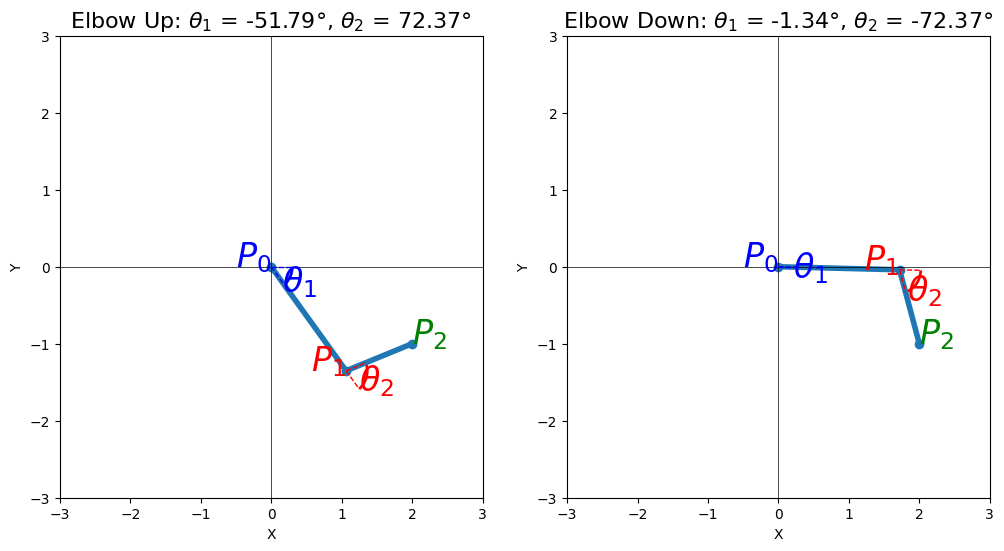

In [3]:
from robot_kinematics import create_interactive_inverse
create_interactive_inverse()

### 2.1.1 正运动学分析（Forward Kinecmatics Anlysis)


几何方法是分析机器人运动学的一个基本工具，特别适用于连杆机器人系统。通过几何关系，可以从关节的角度（$θ$）推导出机器人末端执行器的位置，称为正运动学问题；或者从末端执行器的位置推导出关节的角度，称为逆运动学问题。

####  几何图解法


几何图解法是一种基于几何形状和三角函数关系的分析方法。在机械臂的运动学模型中，每一个连杆和关节都可以用简单的几何图形来表示。通过几何图解，我们可以直观地看到各个关节和连杆的位置关系，并通过基本的三角函数计算得到所需的运动学参数。

对于一个两连杆机械臂（如双连杆机械臂），其几何图解分析如下：

- 设 $l_1$ 和 $l_2$ 分别为两根连杆的长度，$θ_1$ 和 $θ_2$ 为两个关节的旋转角度。
- 关节角度和连杆的长度决定了末端执行器的位置。使用几何图解法，我们可以利用三角形中的正弦定理和余弦定理来确定末端执行器的位置。
  
正运动学公式可以通过几何关系直接推导出来：
- 第一个关节位置 $P_1$:
  $$
  P_1 = (x_1, y_1) = (l_1 \cos(θ_1), l_1 \sin(θ_1)) \tag{2.1}
 $$
- 第二个关节位置 $P_2$ （末端执行器）:
  $$
  P_2 = (x_2, y_2) = (x_1 + l_2 \cos(θ_1 + θ_2), y_1 + l_2 \sin(θ_1 + θ_2)) \tag{2.2}
 $$


#### 向量图解法

向量图解法是几何方法的一个扩展，通过使用向量来表示连杆和关节之间的关系。向量图解法的优势在于它不仅能直观地表示机器人系统的结构，还能方便地进行代数计算，尤其适合复杂的多连杆系统。

##### 手动推导


在向量图解法中，机械臂的每个连杆可以看作一个向量，关节之间的旋转则是向量的旋转变换。以下是两连杆机械臂的向量表示：

- 定义第一个连杆的向量 $\overrightarrow{P_0P_1}$：
  $$
  \overrightarrow{P_0P_1} = \left[ l_1 \cos(θ_1), l_1 \sin(θ_1) \right] \tag{2.3}
  $$
  
- 定义第二个连杆的向量 $\overrightarrow{P_1P_2}$：
  $$
  \overrightarrow{P_1P_2} = \left[ l_2 \cos(θ_1 + θ_2), l_2 \sin(θ_1 + θ_2) \right] \tag{2.4}
  $$

通过向量加法，可以得到末端执行器的位置 $\overrightarrow{P_0P_2}$：
$$
\overrightarrow{P_0P_2} = \overrightarrow{P_0P_1} + \overrightarrow{P_1P_2} \tag{2.5}
$$
代入公式：
$$
\overrightarrow{P_0P_2} = \left[ l_1 \cos(θ_1) + l_2 \cos(θ_1 + θ_2), l_1 \sin(θ_1) + l_2 \sin(θ_1 + θ_2) \right] \tag{2.6}
$$

这种方法允许我们以向量的形式分析机器人末端的位置，结合代数运算进行复杂系统的运动学分析。

##### Python公式推导与验证

首先初始化书写已知变量

In [3]:
import sympy as sp
# 启用 LaTeX 渲染
sp.init_printing()
# 定义符号变量
theta_1, theta_2 = sp.symbols('theta_1 theta_2')
l1, l2 = sp.symbols('l1 l2')

然后开始构建$\overrightarrow{P_0P_1}$向量

In [4]:
# 向量POP1
P0P1 = sp.Matrix([l1 * sp.cos(theta_1), l1 * sp.sin(theta_1)])
P0P1

⎡l₁⋅cos(θ₁)⎤
⎢          ⎥
⎣l₁⋅sin(θ₁)⎦

然后开始构建$\overrightarrow{P_1P_2}$向量，我们这里要注意，此时相对于绝对坐标系来说，在$X$轴和$Y$轴的投影是$\theta_{ii}$,所以我们要先定义$\theta_{ii}$然后计算

In [5]:
# 向量POP1
theta_ii=sp.symbols('theta_{ii}')
P1P2 = sp.Matrix([l2 * sp.cos(theta_ii), l2 * sp.sin(theta_ii)])
P1P2

⎡l₂⋅cos(θ_{ii})⎤
⎢              ⎥
⎣l₂⋅sin(θ_{ii})⎦

最终的$\overrightarrow{P_0P_2}$向量满足公式$\overrightarrow{P_0P_2} = \overrightarrow{P_0P_1} + \overrightarrow{P_1P_2}$

In [6]:
P0P2=P0P1+P1P2
P0P2

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ_{ii})⎤
⎢                           ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ_{ii})⎦

其中，$\theta_{ii}=\theta_1+\theta_2$,所以我们需要替换$\theta_{ii}$

In [7]:
P0P2=P0P2.subs(theta_ii,(theta_1+theta_2))
P0P2


⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

最后我们代入数据验证和图像中是否一致

In [8]:
# 使用字典进行变量替换
# 使用批量替换，定义要替换的符号和它们的值
theta_1_val=53
theta_2_val=-26
subs_values = {theta_1: sp.rad(theta_1_val), theta_2: sp.rad(theta_2_val), l1: 1.72, l2: 1.0}
# 对 P0P2 批量替换并数值化
P0P2_evaluated = [coord.subs(subs_values).evalf() for coord in P0P2]
P0P2_evaluated


### 2.1.2 逆运动学分析(Inverse Kinematics Anlysis)



逆运动学是通过已知末端执行器的位置来计算机器人的关节角度。对于一个两连杆机械臂，逆运动学问题相对于正运动学较为复杂，因为我们从给定的终端位置 $(x, y)$ 推导出关节角 $\theta_1$ 和 $\theta_2$。

设定两个连杆的长度为 $l_1$ 和 $l_2$，末端执行器的位置为 $(x, y)$。我们需要推导出如下的方程来求解关节角度 $\theta_1$ 和 $\theta_2$。

#### 几何分析


通过前面的几何分析正运动学或者下图所示，我们可以将问题分解为多个已知几何关系的三角形。首先，通过关节角 $\theta_1$ 和 $\theta_2$，我们知道末端执行器位置 $(x, y)$ 的关系式是：

$$
\left\{
\begin{aligned}
x &= l_1 \cos(\theta_1) + l_2 \cos(\theta_1 + \theta_2) \\
y &= l_1 \sin(\theta_1) + l_2 \sin(\theta_1 + \theta_2)
\end{aligned}
\right.
\tag{2.7}
$$

给定 $x$ 和 $y$，我们的目标是通过逆运动学求解出 $\theta_1$ 和 $\theta_2$。

#### 手动推导

##### 1. **计算极径 $r$**：  


首先，我们可以计算从原点到末端执行器位置的距离 $r$，即末端执行器的位置向量模长：

In [9]:
from robot_kinematics import create_interactive_forward_with_r
create_interactive_forward_with_r()

interactive(children=(FloatSlider(value=35.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…


$$
r = \sqrt{x^2 + y^2} \tag{2.8}
$$


##### 2. 确保条件成立与边界范围计算


这个值表示末端执行器到原点的直线距离。为了确保解的存在性，必须满足下列条件：
$$
\left| l_1 - l_2 \right| \leq r \leq l_1 + l_2 \tag{2.9}
$$
否则目标点超出了机械臂的可达工作空间，无法找到解。
###### 示意图


In [2]:
from robot_kinematics import create_interactive_forward_with_range
create_interactive_forward_with_range()

interactive(children=(FloatSlider(value=35.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…


##### 3. **求解角度 $\theta_2$**

利用余弦定理，我们可以求解第二个关节的角度 $\theta_2$。考虑到末端执行器、关节 1 和关节 2 形成的三角形，我们可以应用[余弦定理(Law of consines)](law_of_cosines.ipynb)。
###### 示意图如下

In [11]:
from robot_kinematics import create_interactive_inverse_for_theta
create_interactive_inverse_for_theta()

interactive(children=(FloatSlider(value=2.0, description='x', max=3.0, min=-3.0, step=0.01), FloatSlider(value…

其中有$\cos(\phi)=\cos(\pi-\theta_2)=\cos(\theta_2)$


故有
$$
\cos(\theta_2) = \frac{r^2 - l_1^2 - l_2^2}{2 l_1 l_2} \tag{2.10}
$$

#### 最终结果



由此，角度 $\theta_2$ 可以表示为：

$$
\theta_2 = \arccos\left( \frac{r^2 - l_1^2 - l_2^2}{2 l_1 l_2} \right) \tag{2.11}
$$

**注意**：由于 $\theta_2$ 可能有两个的正负相反的解（即肘部朝上的解和肘部朝下的解），我们可以通过分别取正角度和负角度来表示这两种情况。
- **肘部朝上**(Elbow Up, $\theta_2 > 0$)
- **肘部朝下**(Elbow Up, $\theta_2 < 0$)

In [12]:
from robot_kinematics import create_interactive_inverse
create_interactive_inverse()

interactive(children=(FloatSlider(value=2.0, description='x', max=3.0, min=-3.0, step=0.01), FloatSlider(value…

3. **求解角度 $\theta_1$**：  
接下来，我们通过几何关系求解第一个关节的角度 $\theta_1$。我们首先计算目标位置与原点之间的夹角 $\phi$：


In [1]:
from robot_kinematics import create_interactive_inverse_for_psi_theta
create_interactive_inverse_for_psi_theta()

interactive(children=(FloatSlider(value=1.95, description='x', max=3.0, min=-3.0, step=0.01), FloatSlider(valu…


$$
\psi = \arctan\left( \frac{y}{x} \right) \tag{2.12}
$$

然后使用几何关系，得出：

$$
\left\{
\begin{aligned}
\theta_1&=\psi-\epsilon\\
\epsilon&=\arctan\left( \frac{l_2 \sin(\theta_2)}{l_1 + l_2 \cos(\theta_2)} \right)
\end{aligned}
\right.
\tag{2.13}
$$

整理得

$$
\theta_1=\psi-\arctan\left( \frac{l_2 \sin(\theta_2)}{l_1 + l_2 \cos(\theta_2)} \right) \tag{2.14}
$$

同样，由于 $\theta_2$ 有两个解，因此 $\theta_1$ 也有两个相应的解。通过这种方式，我们可以获得肘部朝上和肘部朝下的两种解法。

#### 最终公式



根据以上推导，逆运动学的解可以总结如下：

$$
\left\{
\begin{aligned}
\theta_2 &= \arccos\left( \frac{r^2 - l_1^2 - l_2^2}{2 l_1 l_2} \right) \\
\theta_1 &= \arctan\left( \frac{y}{x} \right) - \arctan\left( \frac{l_2 \sin(\theta_2)}{l_1 + l_2 \cos(\theta_2)} \right)
\end{aligned}
\right.
\tag{2.15}
$$

由于 $\theta_2$ 有两个可能的解（肘部朝上和肘部朝下），对于每个 $\theta_2$，我们可以求解相应的 $\theta_1$。最终的结果是两个解：

1. **肘部朝上的解** $(\theta_1^a, \theta_2^a)$
2. **肘部朝下的解** $(\theta_1^b, \theta_2^b)$

#### Python符号变量推导公式